In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [2]:
pair = "EUR_USD"
granularity="H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [33]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,sTime
3996,2024-01-19 02:00:00+00:00,7271,1.08854,1.08898,1.08796,1.08810,1.08847,1.08890,1.08789,1.08802,1.08862,1.08905,1.08804,1.08817,s24-01-19 02:00
3997,2024-01-19 06:00:00+00:00,15481,1.08806,1.08864,1.08680,1.08831,1.08799,1.08857,1.08673,1.08823,1.08814,1.08871,1.08688,1.08839,s24-01-19 06:00
3998,2024-01-19 10:00:00+00:00,15346,1.08828,1.08932,1.08731,1.08807,1.08821,1.08924,1.08723,1.08800,1.08836,1.08940,1.08739,1.08814,s24-01-19 10:00
3999,2024-01-19 14:00:00+00:00,27273,1.08806,1.08935,1.08657,1.08898,1.08799,1.08927,1.08649,1.08890,1.08813,1.08943,1.08665,1.08905,s24-01-19 14:00
4000,2024-01-19 18:00:00+00:00,11775,1.08898,1.08978,1.08858,1.08976,1.08891,1.08970,1.08851,1.08966,1.08905,1.08986,1.08866,1.08986,s24-01-19 18:00


In [30]:
df['sTime']=[dt.datetime.strftime(x, "s%y-%m-%d %H:%M") for x in df.time]

In [36]:
df_plot = df.iloc[:100]

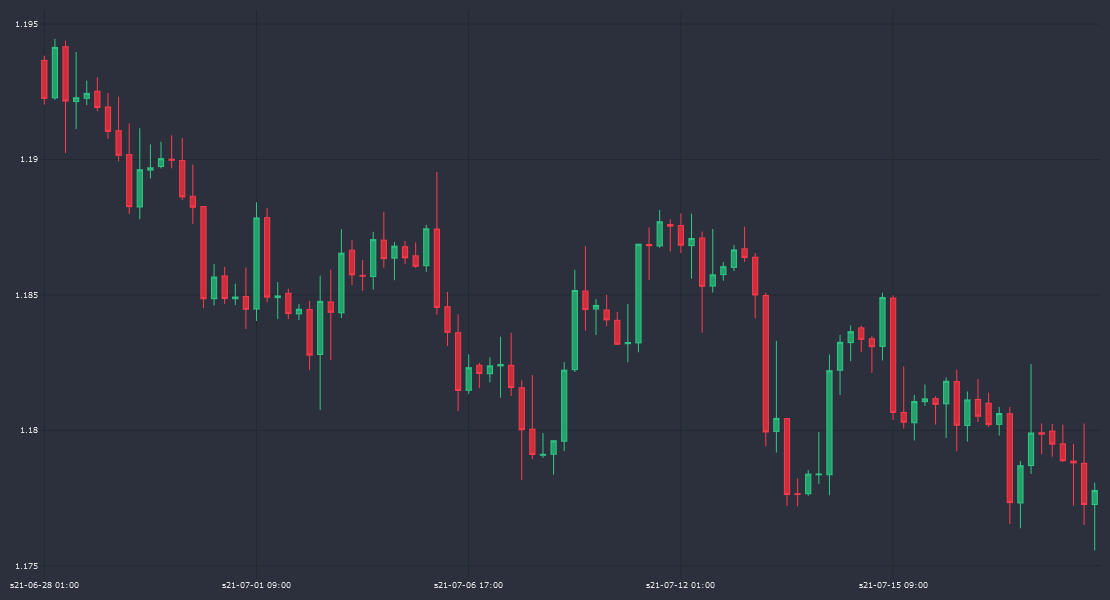

In [38]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=df_plot.sTime,
    open=df_plot.mid_o,
    high=df_plot.mid_h,
    low=df_plot.mid_l,
    close=df_plot.mid_c,
    line=dict(width=1), opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor='#CC2E3C',
    increasing_line_color='#2EC886',
    decreasing_line_color='#FF3A4C',
                        
))


fig.update_yaxes(
    gridcolor="#1f292f"
)
fig.update_xaxes(
    gridcolor="#1f292f",
    rangeslider=dict(visible=False),
    nticks=5
)


fig.update_layout(

    width = 1100,
    height = 600,
    margin=dict(l=10, r=10, b=10, t=10),
    paper_bgcolor="#2c303c",
    plot_bgcolor="#2c303c", 
    font=dict(size=8, color="#e1e1e1")
)

fig.show()